# 문제 1
- https://leetcode.com/contest/weekly-contest-322/problems/circular-sentence/

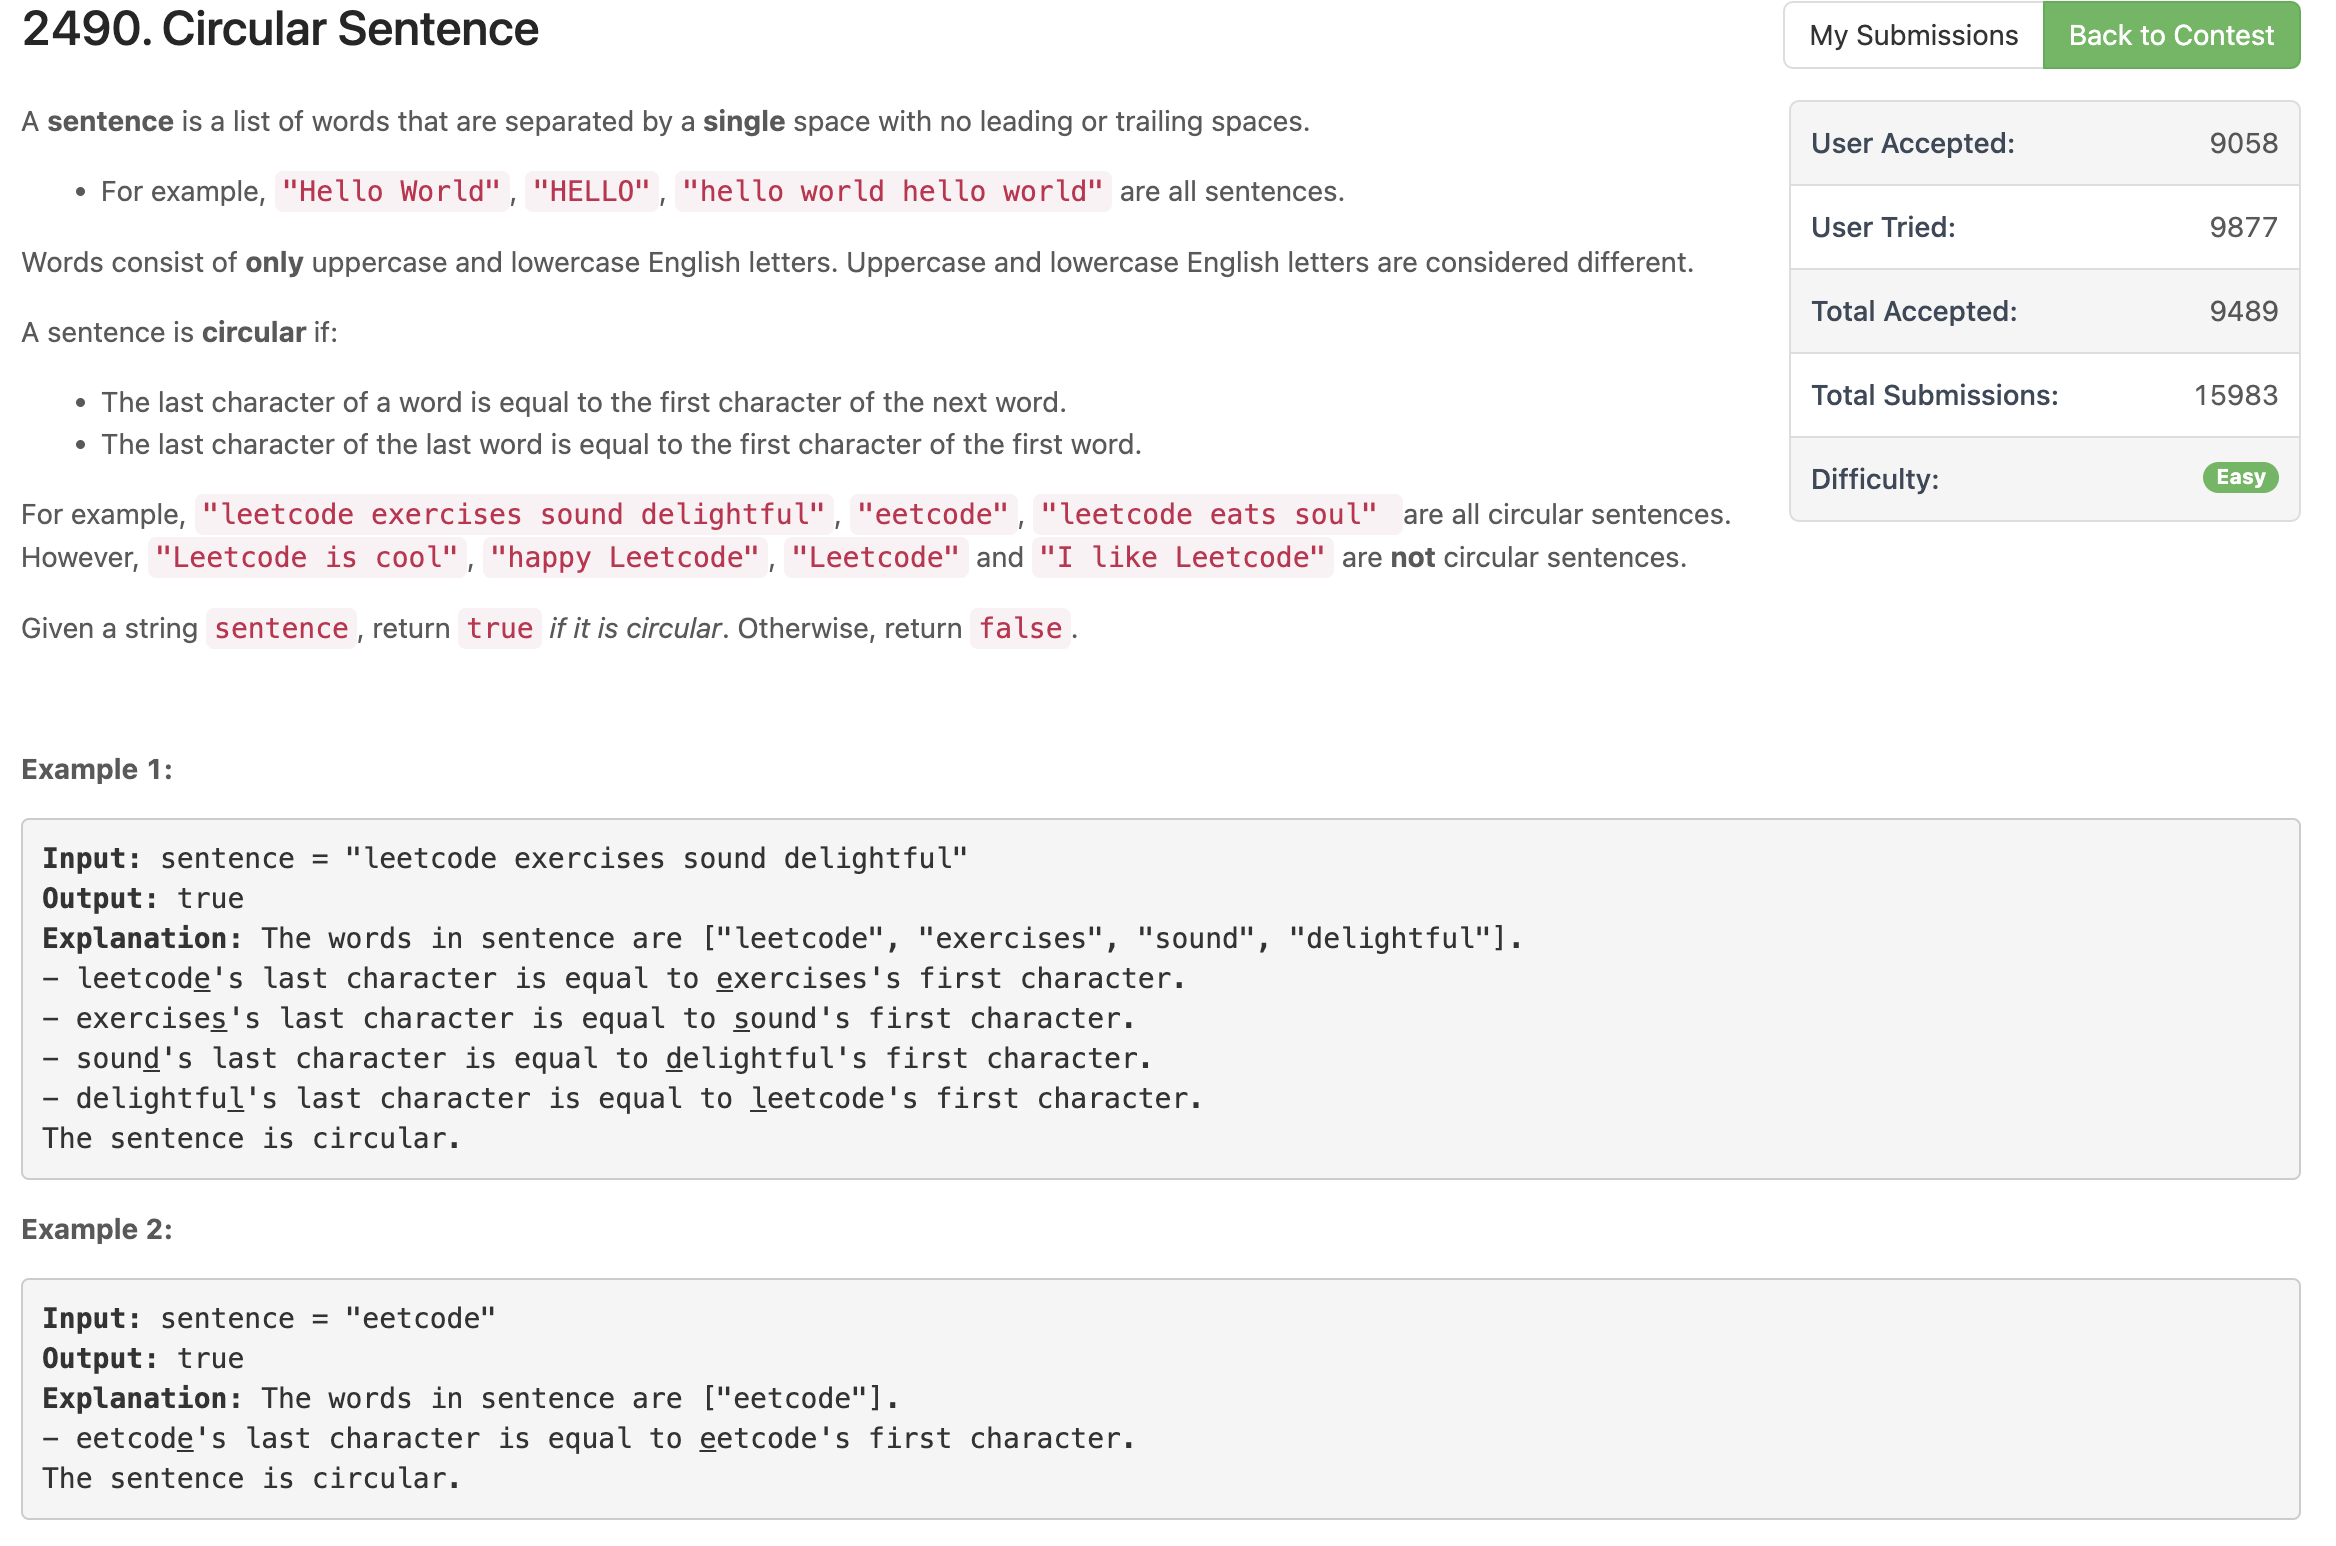
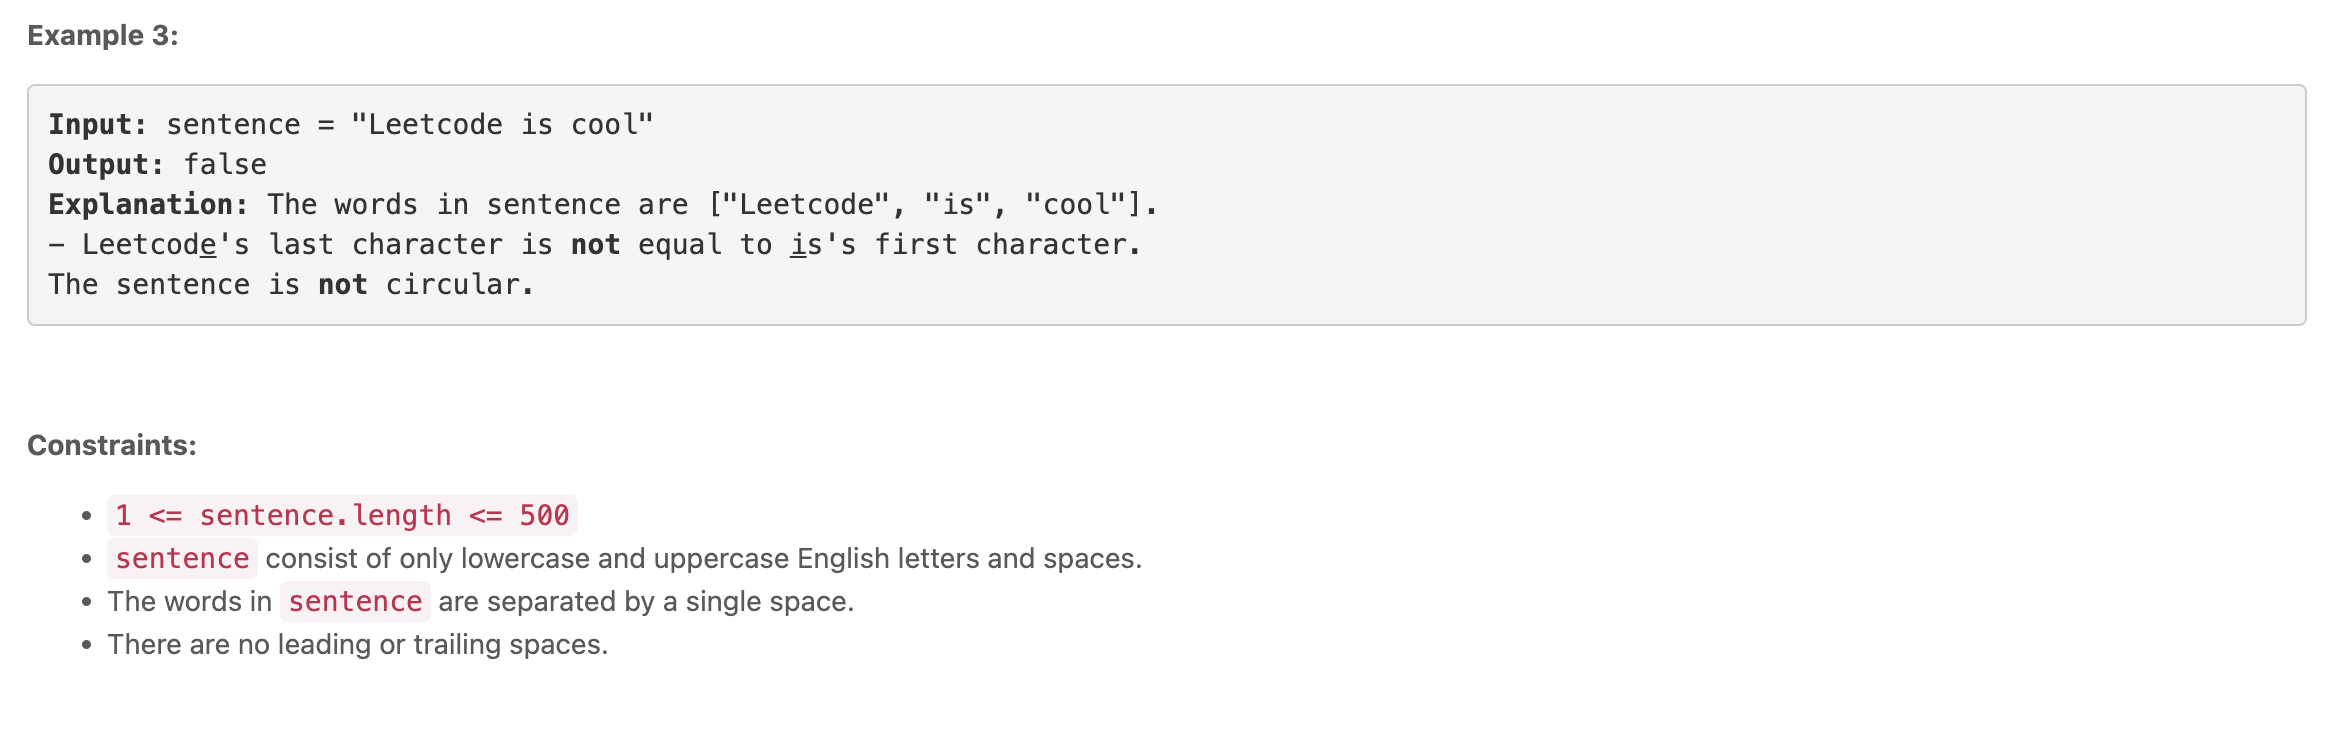

In [ ]:
class Solution:
    def isCircularSentence(self, sentence: str) -> bool:
        sentences = sentence.split(" ")
        n = len(sentences)
        if n == 1:
            if sentences[0][0] == sentences[0][-1]:
                return True
            else:
                return False
        
        else:
            flag = True
            for i in range(n-1):
                if sentences[i][-1] != sentences[i+1][0]:
                    return False
            else:
                if sentences[0][0] != sentences[n-1][-1]:
                    return False
                else:
                    return flag

# 문제 2
- https://leetcode.com/contest/weekly-contest-322/problems/divide-players-into-teams-of-equal-skill/

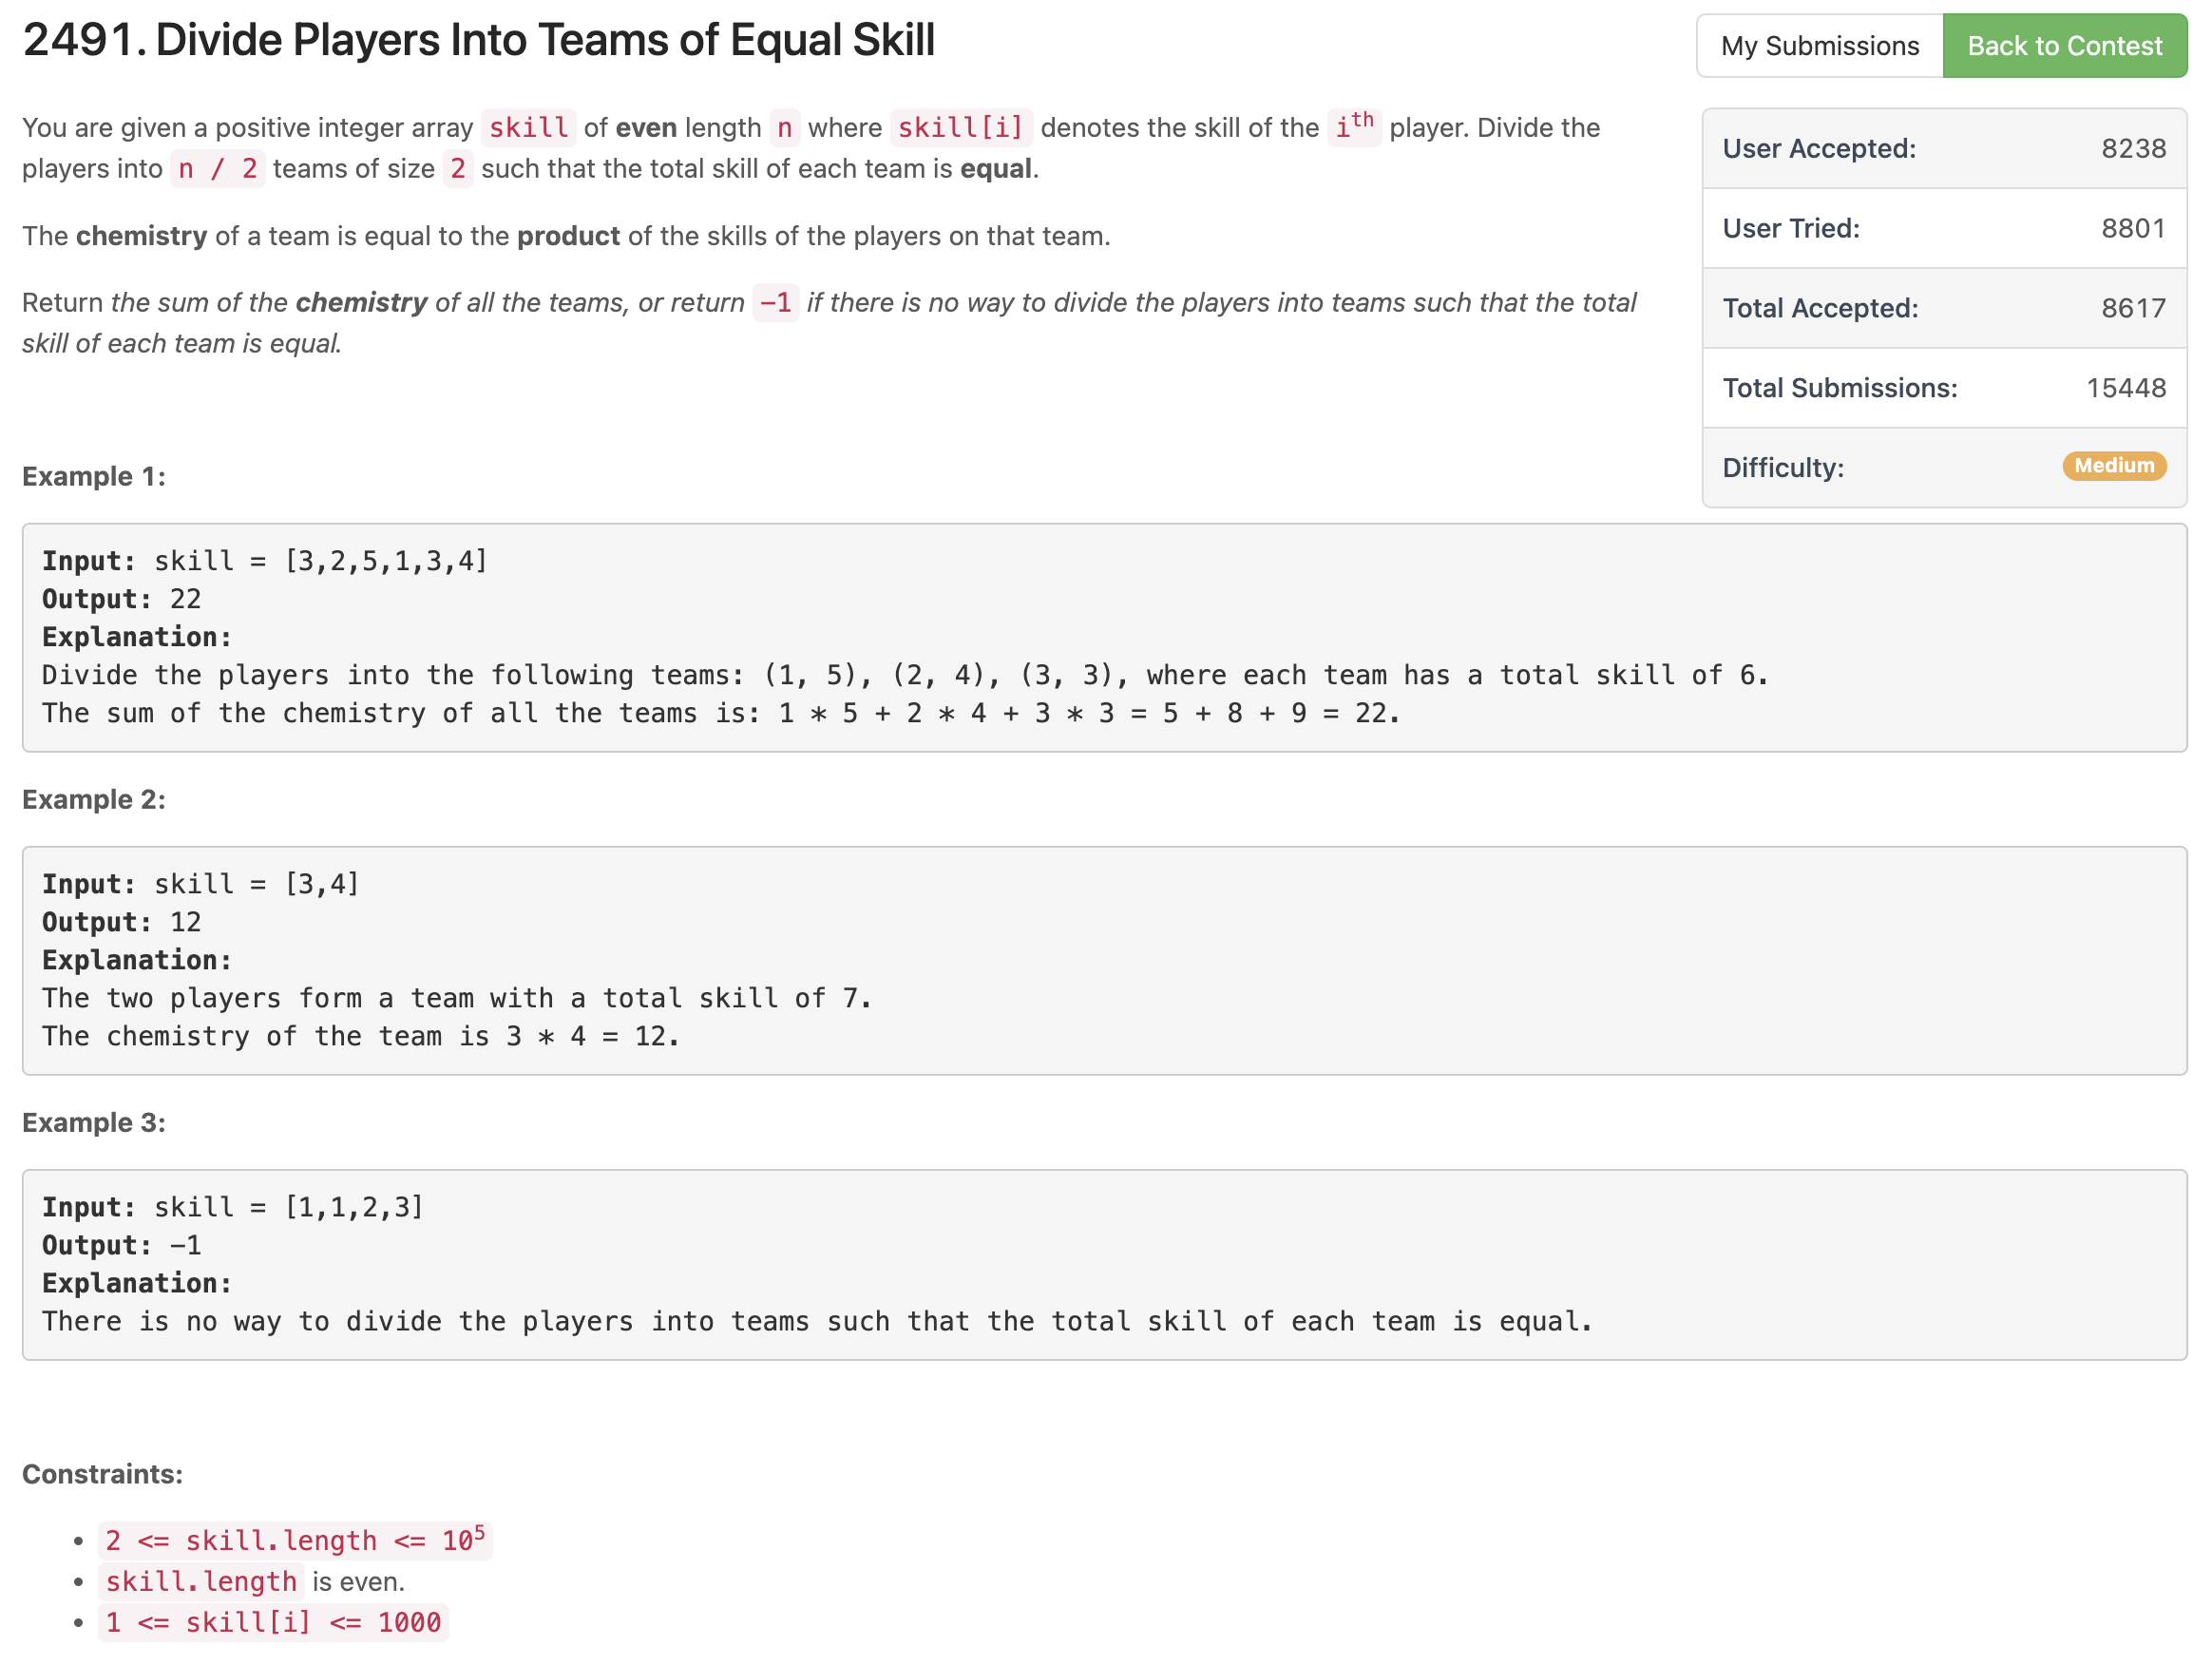

- 무조건 2개씩 짝을 지어야 하니까, 정렬 후 맨 앞 원소와 맨 뒷 원소를 더한 값으로 조합이 맞춰져야 한다
- 그렇지 않으면 어차피 모든 짝이 같을 수가 없음

In [10]:
class Solution:
    def dividePlayers(self, skill: List[int]) -> int:
        skill.sort()
        answer = 0
        target = skill[0] + skill[-1]  # 어차피 2개씩 묶어서 확인해야 됨
        for i in range(len(skill)//2): # 정렬해서 맨 앞 + 맨 뒤 조합을 확인
            if skill[i]+skill[len(skill)-1-i] != target:
                return -1
            else:
                answer += skill[i]*skill[len(skill)-1-i]
        
        return answer

NameError: name 'List' is not defined

# 문제 3
- https://leetcode.com/contest/weekly-contest-322/problems/minimum-score-of-a-path-between-two-cities/

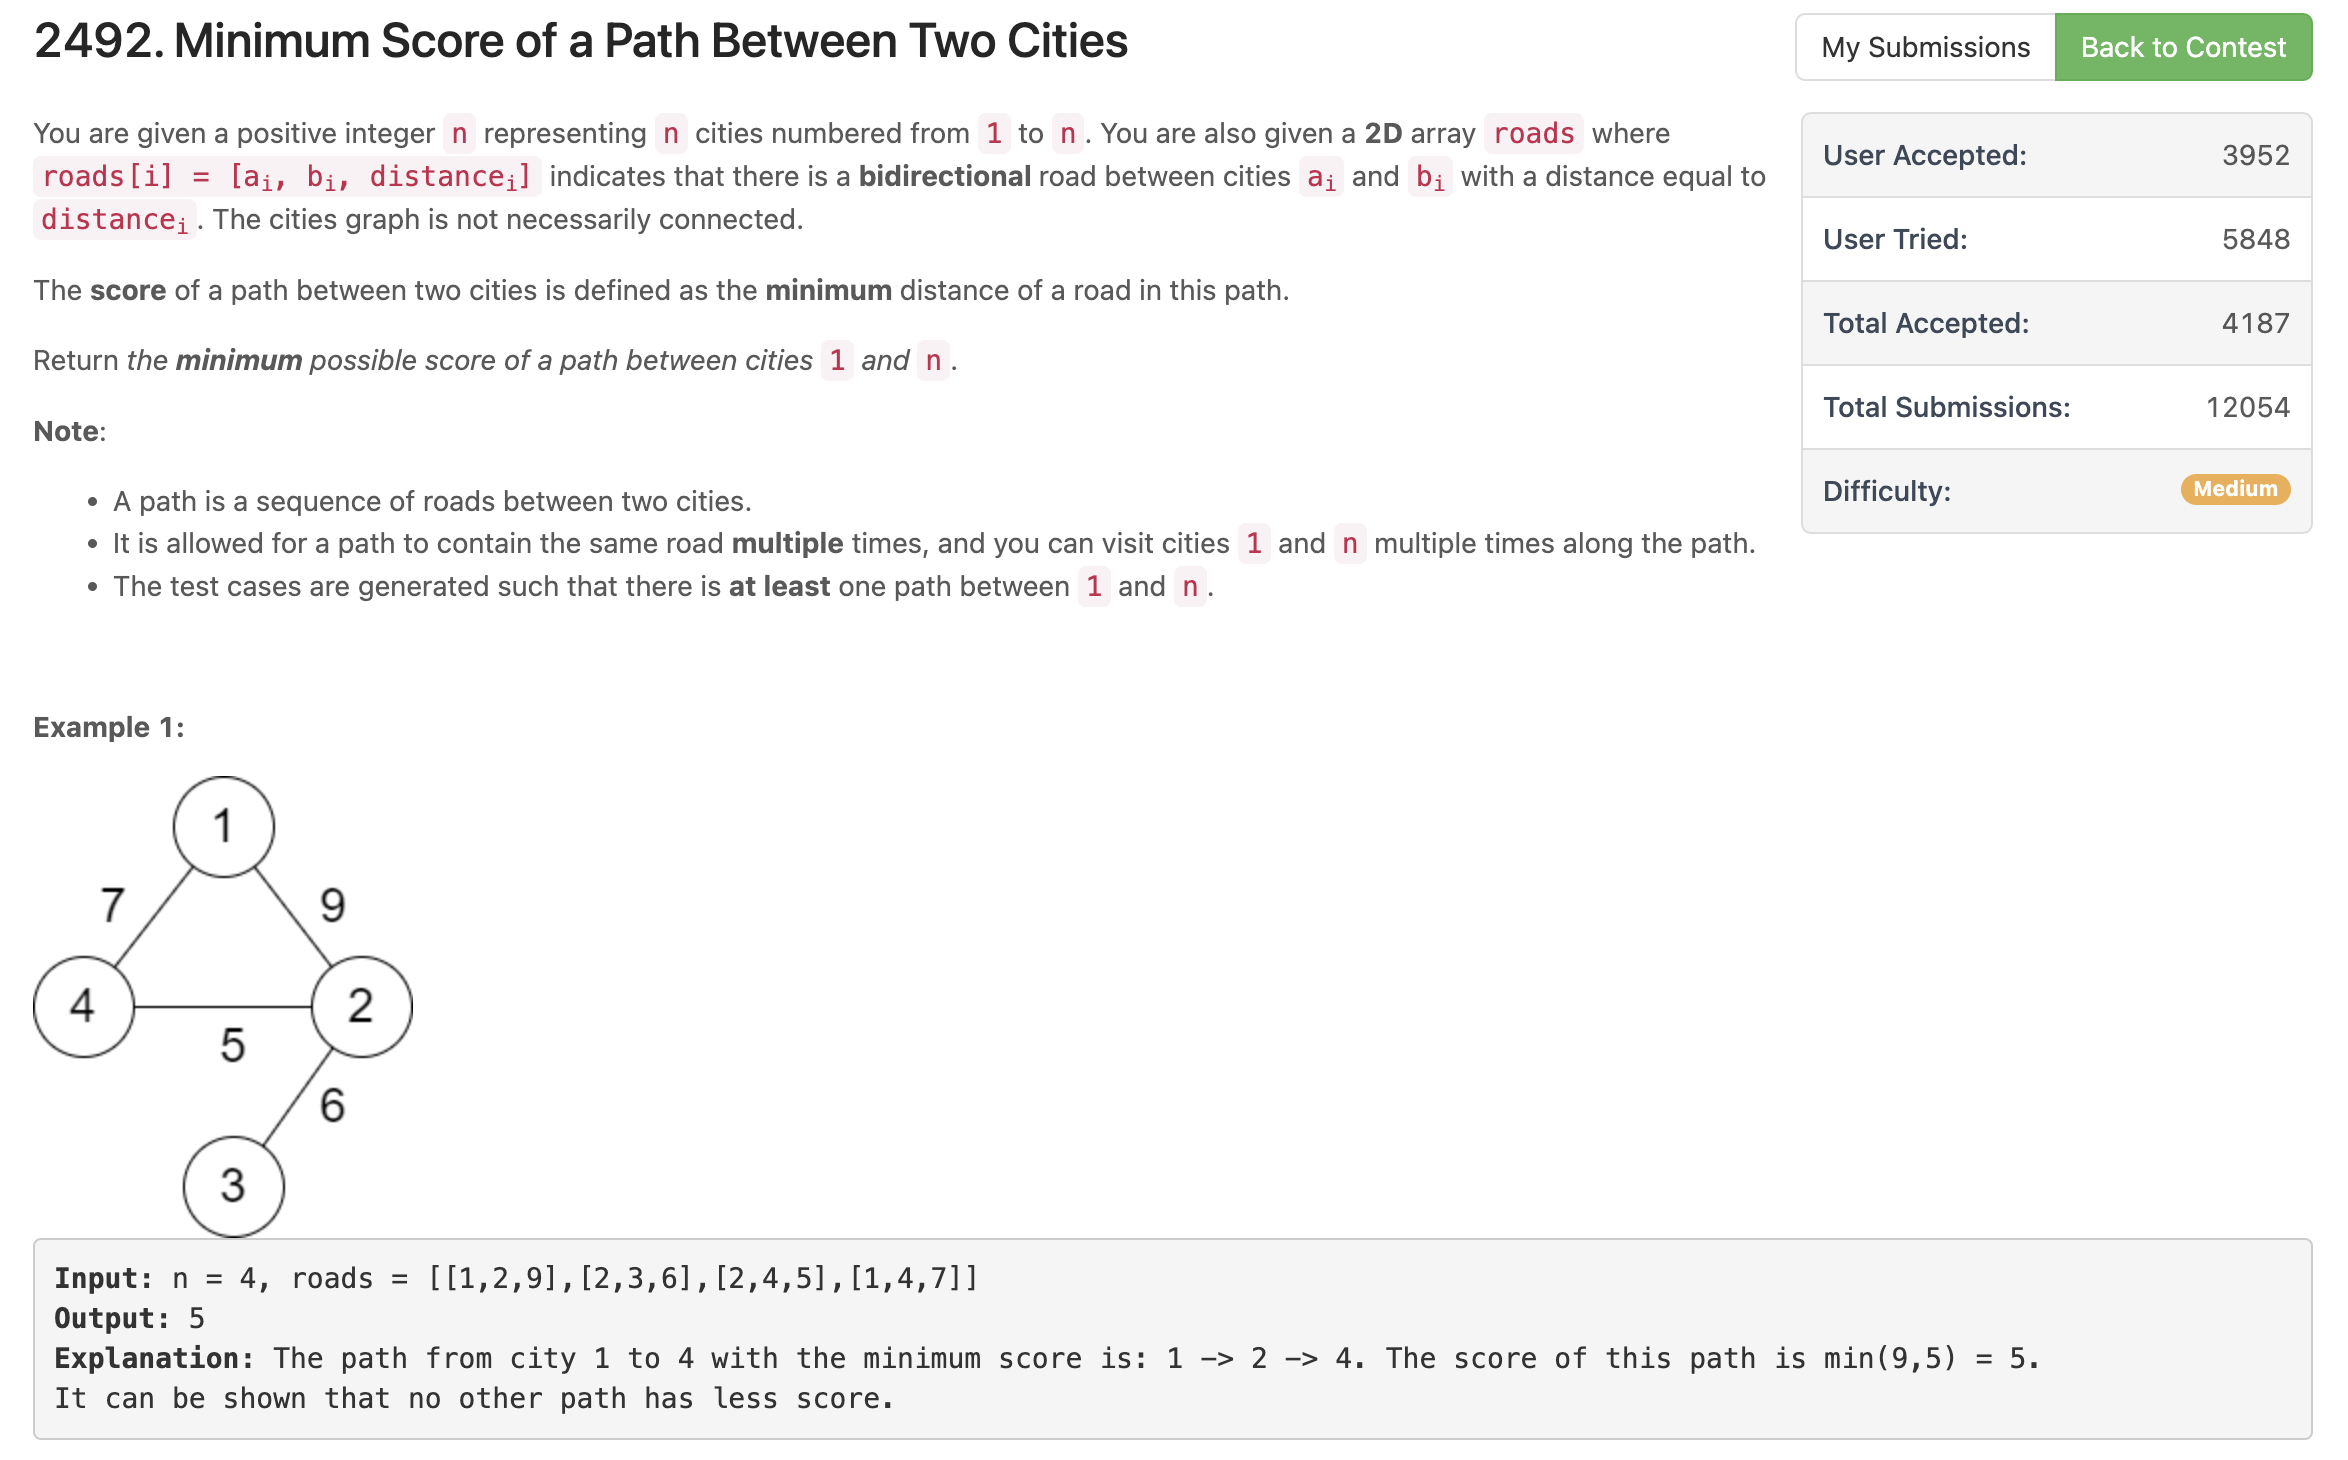
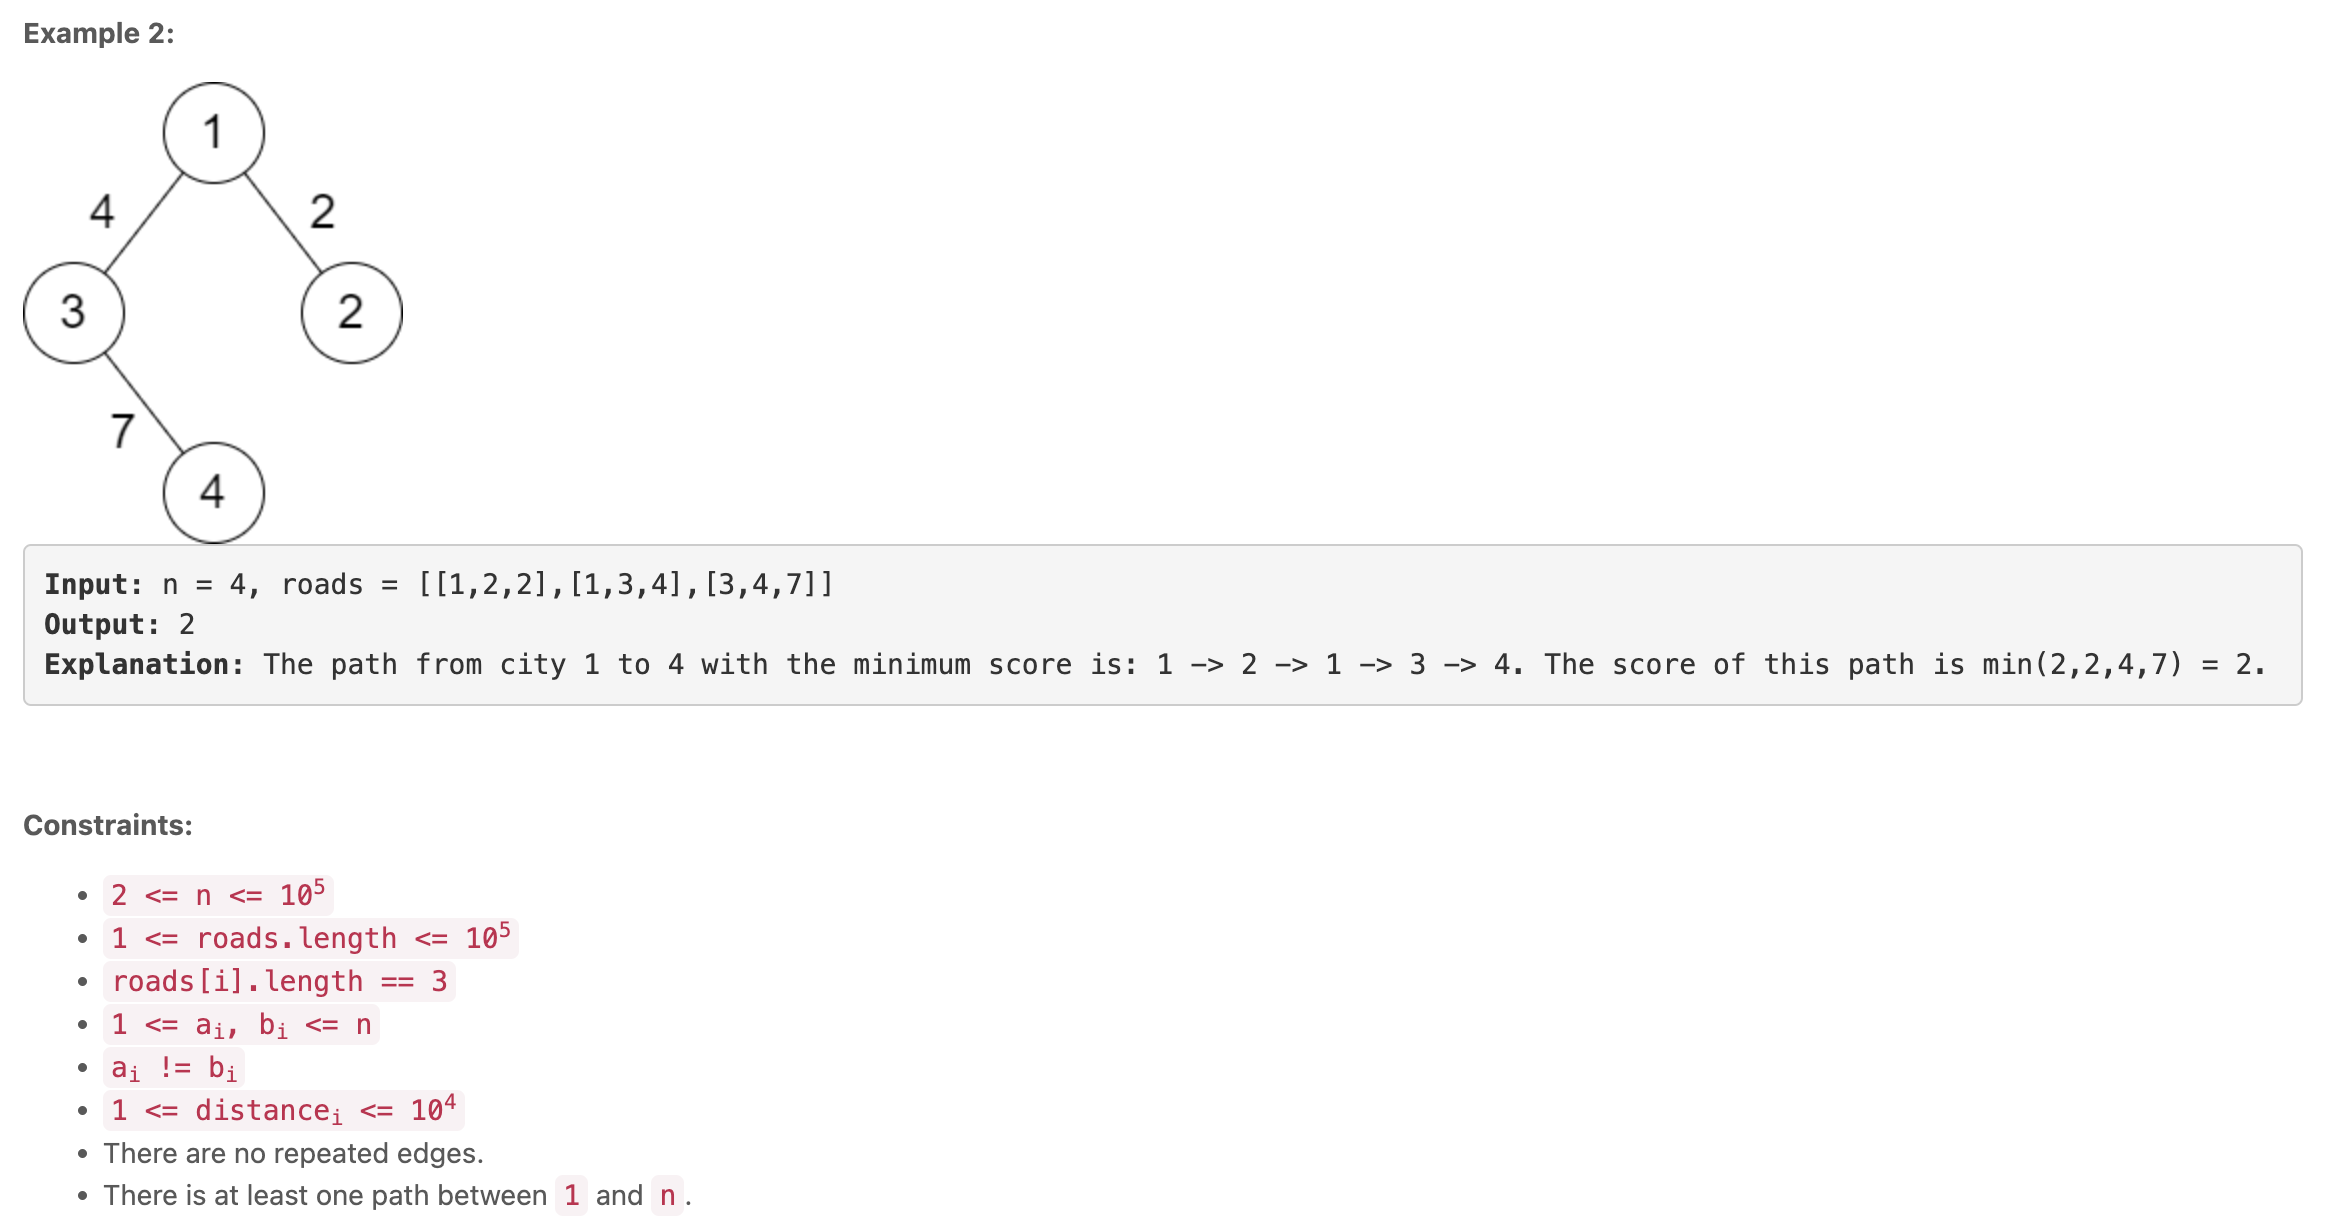

- The test cases are generated such that there is at least one path between 1 and n. : 무조건 갈 수 있음
- 단순하게는 그냥 그래프 노드의 최소값을 찾아버리면 되나?
    - 반례 존재한다
    - 어떤 경우일까?
    - 1,2,3,4 가 있을 때, 1,4가 연결되어 있고 2,3이 따로 연결되어 있는데, 2와 3을 이어주는 가중치가 최소값인 경우

In [ ]:
from collections import deque
class Solution: 
    def minScore(self, n: int, roads: List[List[int]]) -> int:
        graph = [ [] for _ in range(n+1)]
        min_w = 10000
        for a,b,w in roads:
            graph[a].append((b,w))
            graph[b].append((a,w))
            min_w = min(min_w,w)
            
        visited = [10000] * (n+1)
        q = deque()
        q.append((1,visited[1]))
        while q:
            cn,cost = q.popleft() #current_node, cost
            visited[cn] = min(visited[cn], cost) #더 작은 값 최신화
            if visited[n] == min_w:
                return min_w
            
            for nn,weight in graph[cn]: #next_node, weight
                if weight < visited[nn]: #만약 간선 가중치가 다음 노드에 기록된 숫자보다 작다면(최신화의 여지가 있음)
                    visited[nn] = weight
                    q.append((nn,weight))
                    
        return min(visited)
            
                
                
                
        print(graph)